# 3.1 Model Building - Logistic Regression

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

Logistic regression is implemented in LogisticRegression. This implementation can fit binary, One-vs-Rest, or multinomial logistic regression with optional l1, l2 or Elastic-Net regularization

## Importing Neccessary Libraries

In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
import os
import zipfile
import re
import gc

In [7]:
zf = zipfile.ZipFile('G:\My Drive\Spring Term\MSBA 6420 PA\Final Project\Alldata_v3.zip')

In [10]:
train = pd.read_csv(zf.open('train.csv'),low_memory=False)
train = train.rename(columns = lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
train.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,INS_AMT_INSTALMENT_MEAN,INS_AMT_INSTALMENT_SUM,INS_AMT_PAYMENT_MIN,INS_AMT_PAYMENT_MAX,INS_AMT_PAYMENT_MEAN,INS_AMT_PAYMENT_SUM,INS_DAYS_ENTRY_PAYMENT_MIN,INS_DAYS_ENTRY_PAYMENT_MAX,INS_DAYS_ENTRY_PAYMENT_MEAN,INS_DAYS_ENTRY_PAYMENT_SUM
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,11559.247105,219625.695,9251.775,53093.745,11559.247105,219625.695,-587.0,-49.0,-315.421053,-5993.0
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,64754.586000,1618864.650,6662.970,560835.360,64754.586000,1618864.650,-2324.0,-544.0,-1385.320000,-34633.0
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,7096.155000,21288.465,5357.250,10573.965,7096.155000,21288.465,-795.0,-727.0,-761.666667,-2285.0
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,62947.088438,1007153.415,2482.920,691786.890,62947.088438,1007153.415,-575.0,-12.0,-271.625000,-4346.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,12666.444545,835985.340,0.180,22678.785,12214.060227,806127.975,-2318.0,-14.0,-1032.242424,-68128.0


In [127]:
test = pd.read_csv(zf.open('test.csv'),low_memory=False)
test = test.rename(columns = lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

## Using the MinMaxScalar to Normalize the data

In [128]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train.drop(columns=['SK_ID_CURR','TARGET']))
train_data = scaler.transform(train.drop(columns=['SK_ID_CURR','TARGET']))
test_data = scaler.transform(test.drop(columns=['SK_ID_CURR']))

## Imputing NaNs with zeroes

In [129]:
train_data[np.isnan(train_data)] = 0
test_data[np.isnan(test_data)] = 0

## Hyperparameter Tuning

In [43]:
params = {'C':[1e-3,1e-2,1e-1,1e-0]}

In [44]:
log1 = GridSearchCV(LogisticRegression(class_weight='balanced',max_iter=10000), params, cv=5,scoring='roc_auc',verbose=200)
log1.fit(train_data, train['TARGET'])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START C=0.001.....................................................
[CV 1/5; 1/4] END ......................C=0.001;, score=0.767 total time=  21.1s
[CV 2/5; 1/4] START C=0.001.....................................................
[CV 2/5; 1/4] END ......................C=0.001;, score=0.766 total time=  22.5s
[CV 3/5; 1/4] START C=0.001.....................................................
[CV 3/5; 1/4] END ......................C=0.001;, score=0.761 total time=  16.9s
[CV 4/5; 1/4] START C=0.001.....................................................
[CV 4/5; 1/4] END ......................C=0.001;, score=0.767 total time=  19.7s
[CV 5/5; 1/4] START C=0.001.....................................................
[CV 5/5; 1/4] END ......................C=0.001;, score=0.770 total time=  23.7s
[CV 1/5; 2/4] START C=0.01......................................................
[CV 1/5; 2/4] END .......................C=0.01;,

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0]}, scoring='roc_auc',
             verbose=200)

## Training the best fit classifer

In [125]:
log2 = log1.best_estimator_
log2 = log2.set_params(**log1.best_params_)

In [126]:
log2.fit(train_data, train['TARGET'])

LogisticRegression(class_weight='balanced', max_iter=10000)

In [131]:
test1 = log2.predict_proba(test_data)[:, 1]

## Getting the Feature Importances

<AxesSubplot:xlabel='feature'>

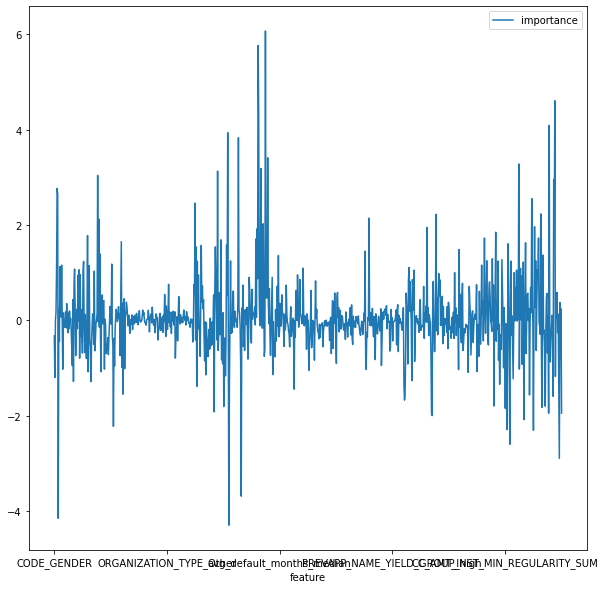

In [112]:
importance = pd.DataFrame({'feature':train.drop(columns=['SK_ID_CURR','TARGET']).columns.to_list(),
                           'importance':log2.coef_[0]})
importance.plot(x='feature',y='importance',figsize=(10,10))

In [113]:
importance['importance_abs'] = abs(importance['importance'])
importance = importance.sort_values(by=['importance_abs'],ascending=False).reset_index(drop=True)
importance.head(10)

,feature,importance,importance_abs
0,CREDIT_DEBT_RATIO_Active,6.068261,6.068261
1,CREDIT_DEBT_RATIO,5.764836,5.764836
2,INS_PAYMENT_DIFF_SUM,4.605813,4.605813
3,AMT_CREDIT_MAX_OVERDUE_Active,4.329265,4.329265
4,CREDIT_TYPE_Mortgage,-4.292507,4.292507
5,AMT_GOODS_PRICE,-4.147309,4.147309
6,INS_DBD_MAX,4.090526,4.090526
7,CREDIT_TYPE_Microloan,3.937657,3.937657
8,latest_credit_enddate_active,3.829889,3.829889
9,max_loan_duration_active,-3.683770,3.683770


## Listing features that explain top 90% variance

In [114]:
importance['%variance'] = importance['importance_abs'].cumsum()/importance['importance_abs'].sum()

In [115]:
Top90_features = importance[importance['%variance']<=0.9]['feature'].to_list()

## Building model with top90% features

In [132]:
scaler2 = MinMaxScaler(feature_range = (0, 1))
scaler2.fit(train[Top90_features])
train_data_top90 = scaler2.transform(train[Top90_features])
train_data_top90[np.isnan(train_data_top90)] = 0
test_data_top90 = scaler2.transform(test[Top90_features])
test_data_top90[np.isnan(test_data_top90)] = 0

In [133]:
log3 = log1.best_estimator_
log3 = log3.set_params(**log1.best_params_)

In [134]:
log3.fit(train_data_top90,train['TARGET'])

LogisticRegression(class_weight='balanced', max_iter=10000)

In [136]:
test2 = log3.predict_proba(test_data_top90)[:,1]

## Exporting Results for Evaluation

In [141]:
submit1 = pd.DataFrame({'SK_ID_CURR':test['SK_ID_CURR'],
                        'TARGET':test1})

submit2 = pd.DataFrame({'SK_ID_CURR':test['SK_ID_CURR'],
                        'TARGET':test2})

submit1.to_csv("Logisitic_All.csv",index=False)
submit2.to_csv("Logisitic_top90.csv",index=False)

## Model with All features
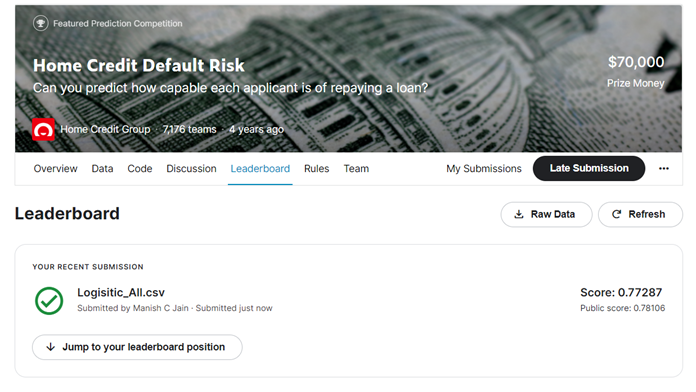

## Model with Top 90% features
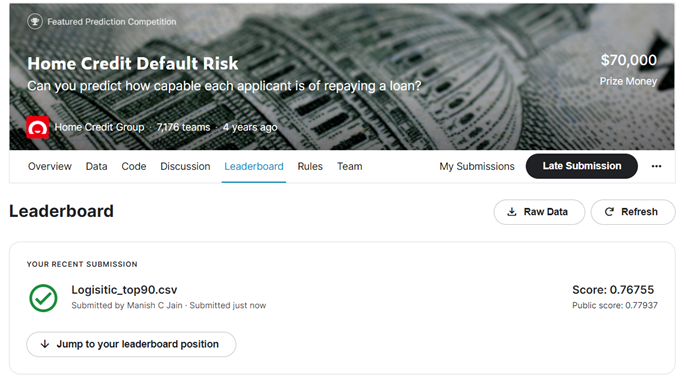